In [1]:
using HDF5
using PyCall
using PyPlot

In [7]:
include("/Users/rzhoufias.uni-frankfurt.de/Documents/Code/PIV/multi_quickPIV/src/multi_quickPIV.jl")

Main.multi_quickPIV

# Read .h5 single slice data

In [8]:
function read_h5(folder_path::String, data_name::String)
    h5open(folder_path, "r") do file
        read(file, data_name)
    end
end

read_h5 (generic function with 1 method)

In [9]:
file_path = "/Users/rzhoufias.uni-frankfurt.de/Documents/PhD_Franziska/Headon/data_featherbud_formation_chicken/headon_video1_layer5.h5"

mesenchym_img = Float16.(read_h5(file_path, "data"))

1024×1024×395 Array{Float16, 3}:
[:, :, 1] =
 635.0      533.0        1.095e3  …    2.24e3     2.722e3    1.678e3
   1.01e3   466.0      300.0           2.372e3  867.0        1.02e3
 196.0       32.0      571.0           2.712e3    3.728e3    1.879e3
 289.0      465.0      737.0           3.736e3    1.268e3    2.884e3
   1.413e3    2.006e3   53.0           2.784e3  990.0        2.732e3
 441.0      216.0        2.476e3  …    1.031e3    2.104e3    1.412e3
   1.176e3  522.0        3.124e3       2.98e3     2.192e3    2.85e3
 840.0        1.015e3    3.772e3       2.554e3    3.068e3    1.94e3
 446.0        1.943e3    2.868e3       2.888e3  857.0        1.227e3
 672.0        4.6e3      6.34e3        1.08e3   776.0        1.672e3
   2.788e3    2.872e3    4.788e3  …    1.799e3  731.0      204.0
   2.144e3    2.884e3    5.424e3     309.0      172.0       41.0
   5.224e3    4.676e3  610.0         701.0       67.0      187.0
   ⋮                              ⋱                        
  43.0      6

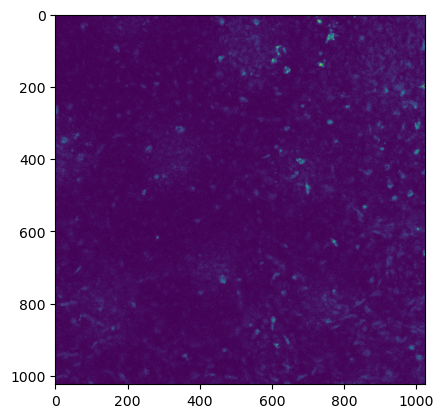

PyObject <matplotlib.image.AxesImage object at 0x1729c2570>

In [14]:
PyPlot.imshow(mesenchym_img[:,:,200])

# Do PIV for time period of 0 frame - 200 frame 

In this time period, the condensates are clear and forming. Could consider to cut the period into two parts, one from 0-100 and the other from 100-200 frames. 
Goal: Capture possbile cell movement dynamics and probably vorticity. 
Possible methods: pseudo trajectory for short time period. 